In [1]:
import numpy as np
import scipy
from spectralCD import *
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite
from cdlib import algorithms, viz
from numpy import linalg as LA

In [2]:
a_matrix = np.loadtxt('leucemia.txt', dtype=int)
a_matrix = a_matrix.astype(np.float64)
A = scipy.sparse.csr_matrix(a_matrix)

In [3]:
a_matrix

array([[1080.,  114.,   89., ...,  325., 1322.,  263.],
       [ 211.,  731.,  439., ...,   44.,   25.,   20.],
       [  20.,   20.,   20., ...,   20.,   20.,   20.],
       ...,
       [  20.,   20.,   20., ...,   20.,   20.,   20.],
       [ 481.,  200., 1133., ...,  136.,  738., 1137.],
       [1380., 1138., 1721., ...,  681.,  909.,  370.]])

In [4]:
G = bipartite.from_biadjacency_matrix(A)

In [5]:
malattie, pazienti, fielder  = communities(G,10)

In [6]:
malattie

[[5003,
  5008,
  5013,
  5018,
  5009,
  5019,
  5015,
  5001,
  5014,
  5000,
  5007,
  5012,
  5017,
  5028,
  5006,
  5002,
  5004,
  5011],
 [5005,
  5016,
  5035,
  5036,
  5010,
  5032,
  5027,
  5031,
  5033,
  5034,
  5037,
  5029,
  5030],
 [5026, 5021, 5020, 5024, 5022, 5023, 5025]]

In [7]:
x = np.array([i for i in range(fielder.shape[0])])
import matplotlib.pyplot as plt

In [8]:
colori_paz = []
pazienti.sort()
for p in pazienti:
    for i in range(len(malattie)):
        if p in malattie[i]:
            colori_paz.append(i)


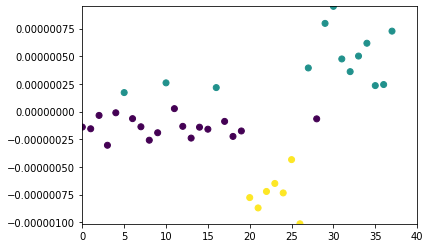

In [9]:
plt.scatter(x, fielder,c = colori_paz)
plt.axis([0,40, np.min(fielder),np.max(fielder)])
plt.show()

In [10]:
# to hold weight of the original bi graph
def my_weight(G, u, v, weight="weight"):
    w = 0
    for nbr in set(G[u]) & set(G[v]):
        w += G[u][nbr].get(weight, 1) + G[v][nbr].get(weight, 1)
    return w

In [11]:
gene_activities = {n for n, d in G.nodes(data=True) if d["bipartite"] == 0}
patients = set(G) - gene_activities #to obtain 2 set of nodes. 
                                  #This is usefull because a lot of bipartite functions need a set of nodes
print(len(gene_activities))
print(len(patients))

5000
38


In [12]:
G_H= bipartite.generic_weighted_projected_graph(G, list(patients), weight_function=my_weight)
print(nx.info(G_H))

Name: 
Type: Graph
Number of nodes: 38
Number of edges: 703
Average degree:  37.0000


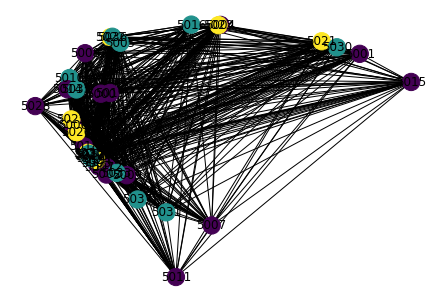

In [15]:
color_map = []
for node in G_H:
    if node in malattie[0]:
        color_map.append(0)
        continue
    elif node in malattie[1]:
        color_map.append(1)
        continue
    else:
        color_map.append(2)   
nx.draw(G_H, node_color=color_map, with_labels=True)
plt.show()

# Test on our netwoek

In [2]:
def read_net_w(filename):
    g = nx.Graph()
    with open(filename) as f:
        f.readline()
        for l in f:
            l = l.split(",")
            g.add_node(l[0], bipartite = 0)
            g.add_node(l[1], bipartite = 1)
            g.add_edge(l[0], l[1], weight=int(l[2]))
            
    return g



g = read_net_w(f'Data/weighted_net_amsterdam.csv')

In [3]:
print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 11266
Number of edges: 11265
Average degree:   1.9998


In [4]:
top_nodes = {n for n, d in g.nodes(data=True) if d["bipartite"] == 0}
bottom_nodes = set(g) - top_nodes #to obtain 2 set of nodes. 
                                  #This is usefull because a lot of bipartite functions need a set of nodes
print(len(top_nodes))
print(len(bottom_nodes))

11110
156


In [18]:
comm ,case,fielder = communities(g,30,scaler = StandardScaler())

In [19]:
comm2 ,case2,fielder2 = communities(g,30,scaler = MinMaxScaler())

In [15]:
import pickle

with open("communities.txt", "wb") as fp:
    pickle.dump(comm, fp)
    
with open("fielder.txt", "wb") as fp:
    pickle.dump(fielder, fp)
    
with open("case.txt", "wb") as fp:
    pickle.dump(case, fp)

In [5]:
import pickle


with open('communities.txt', 'rb') as c:
    comm = pickle.load(c)

with open('fielder.txt', 'rb') as f:
    fielder = pickle.load(f)

with open('case.txt', 'rb') as h:
    case = pickle.load(h)

In [6]:
# to hold weight of the original bi graph
def my_weight(G, u, v, weight="weight"):
    w = 0
    for nbr in set(G[u]) & set(G[v]):
        w += G[u][nbr].get(weight, 1) + G[v][nbr].get(weight, 1)
    return w

In [7]:
g_l= bipartite.generic_weighted_projected_graph(g, list(bottom_nodes), weight_function=my_weight)
print(nx.info(g_l))

Name: 
Type: Graph
Number of nodes: 156
Number of edges: 701
Average degree:   8.9872


In [10]:
for i in range(len(comm)):
    print("community {} size: {}".format(i,len(comm[i])))

community 0 size: 71
community 1 size: 9
community 2 size: 6
community 3 size: 70


In [11]:
colori = []
for p in case:
    for i in range(len(comm)):
        if p in comm[i]:
            colori.append(i)

### Viz of communities

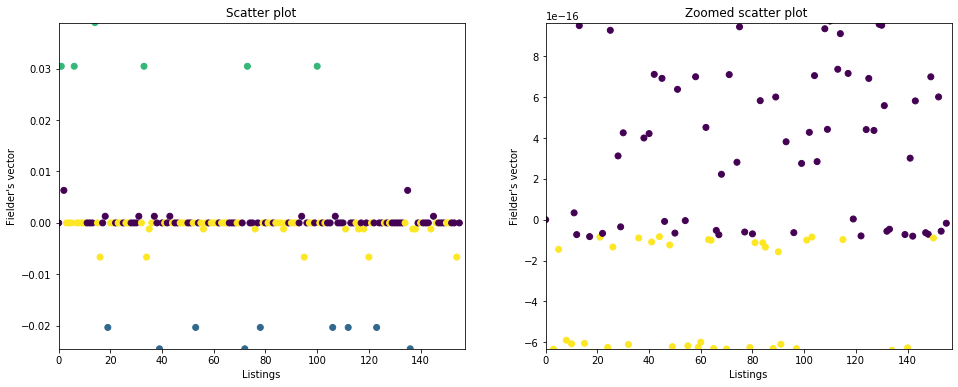

In [12]:
x = np.array([i for i in range(fielder.shape[0])])

fig = plt.figure(figsize=(16,6) )



plt.subplot(1,2,1)
plt.scatter(x, fielder,c = colori)
plt.axis([0,len(x)+1, np.amin(fielder),np.amax(fielder)])
plt.title("Scatter plot")
plt.xlabel("Listings")
plt.ylabel("Fielder's vector")


plt.subplot(1,2,2)
plt.scatter(x, fielder,c = colori)
plt.axis([0,len(x)+1, np.percentile(fielder,30),np.percentile(fielder,90)])
plt.xlabel("Listings")
plt.ylabel("Fielder's vector")
plt.title('Zoomed scatter plot ')

plt.show()

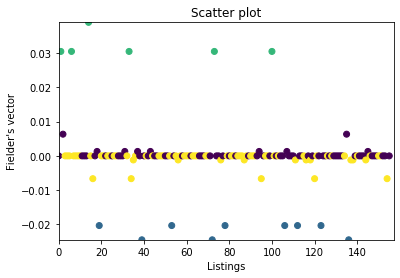

In [13]:
x = np.array([i for i in range(fielder.shape[0])])
plt.scatter(x, fielder,c = colori)
plt.axis([0,len(x)+1, np.amin(fielder),np.amax(fielder)])
plt.title("Scatter plot")
plt.xlabel("Listings")
plt.ylabel("Fielder's vector")
plt.show()

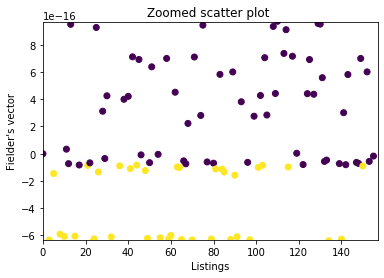

In [14]:
x = np.array([i for i in range(fielder.shape[0])])
plt.scatter(x, fielder,c = colori)
plt.axis([0,len(x)+1, np.percentile(fielder,30),np.percentile(fielder,90)])
plt.xlabel("Listings")
plt.ylabel("Fielder's vector")
plt.title('Zoomed scatter plot ')
plt.show()

In [15]:
for u,data in g_l.nodes(data = True):
    print(u,data)

2818 {'bipartite': 1}
35271224 {'bipartite': 1}
10240434 {'bipartite': 1}
19890254 {'bipartite': 1}
20702723 {'bipartite': 1}
13189108 {'bipartite': 1}
9996040 {'bipartite': 1}
34882977 {'bipartite': 1}
18514561 {'bipartite': 1}
6512505 {'bipartite': 1}
14829814 {'bipartite': 1}
27525864 {'bipartite': 1}
1583266 {'bipartite': 1}
4656557 {'bipartite': 1}
1924194 {'bipartite': 1}
16804326 {'bipartite': 1}
35377242 {'bipartite': 1}
1601408 {'bipartite': 1}
23575414 {'bipartite': 1}
21321370 {'bipartite': 1}
11708784 {'bipartite': 1}
16277689 {'bipartite': 1}
15780515 {'bipartite': 1}
40791472 {'bipartite': 1}
20878711 {'bipartite': 1}
14245271 {'bipartite': 1}
10923071 {'bipartite': 1}
15564496 {'bipartite': 1}
37161821 {'bipartite': 1}
2472277 {'bipartite': 1}
7812608 {'bipartite': 1}
29919168 {'bipartite': 1}
12897197 {'bipartite': 1}
685990 {'bipartite': 1}
17005568 {'bipartite': 1}
19242200 {'bipartite': 1}
15110159 {'bipartite': 1}
14021349 {'bipartite': 1}
16696921 {'bipartite': 1}


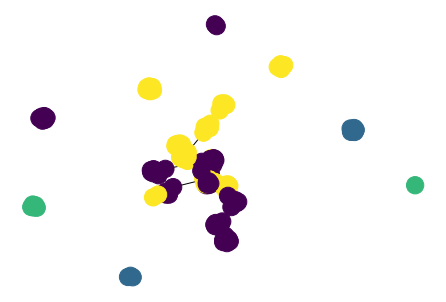

In [21]:
nx.draw(g_l, node_color=colori)
plt.show()

# Searching important nodes into communities

Degree centrality

In [16]:
lista = comm
for i,c in enumerate(lista):
    degrees = dict(g_l.subgraph(c).degree())
    max_degree = [(k, v) for k, v in sorted(degrees.items(), key=lambda item: -item[1])][:3]
    print("In community {} node with highest degree are {},{},{}".format(i,max_degree[0],max_degree[1],max_degree[2]))

In community 0 node with highest degree are ('3003918', 10),('17005568', 9),('10240434', 9)
In community 1 node with highest degree are ('26000561', 5),('34882977', 5),('33990484', 5)
In community 2 node with highest degree are ('2818', 4),('20203218', 4),('26560199', 4)
In community 3 node with highest degree are ('14173331', 26),('16696921', 20),('20321345', 20)


###### Geometric centralities

Closeness Centrality

In [17]:
for i,c in enumerate(lista):
    closeness =  nx.closeness_centrality(g_l.subgraph(c))
    max_closeness = [(k, v) for k, v in sorted(closeness.items(), key=lambda item: -item[1])][:3]
    print("In community {} node with highest closeness are {},{},{} \n".format(i,max_closeness[0],max_closeness[1],max_closeness[2]))

In community 0 node with highest closeness are ('2761156', 0.2194805194805195),('654931', 0.21580207501995213),('24628192', 0.21108508977361437) 

In community 1 node with highest closeness are ('26000561', 0.625),('34882977', 0.625),('33990484', 0.625) 

In community 2 node with highest closeness are ('2818', 0.8),('20203218', 0.8),('26560199', 0.8) 

In community 3 node with highest closeness are ('16696921', 0.34680005130178276),('20321345', 0.33494363929146537),('14173331', 0.3238711222900946) 



Betweennes Centrality

In [18]:
for i,c in enumerate(lista):
    betweenness =  nx.betweenness_centrality(g_l.subgraph(c))
    max_betweenness = [(k, v) for k, v in sorted(betweenness.items(), key=lambda item: -item[1])][:3]
    print("In community {} node with highest betweenness is {},{},{} \n".format(i,max_betweenness[0],max_betweenness[1],max_betweenness[2]))

In community 0 node with highest betweenness is ('654931', 0.3175983436853002),('2761156', 0.3175983436853002),('24628192', 0.2732919254658385) 

In community 1 node with highest betweenness is ('26000561', 0.0),('34882977', 0.0),('33990484', 0.0) 

In community 2 node with highest betweenness is ('2818', 0.0),('20203218', 0.0),('26560199', 0.0) 

In community 3 node with highest betweenness is ('16696921', 0.23657289002557544),('16277689', 0.226768968456948),('20321345', 0.19224211423699913) 



Harmonic Centrality

In [19]:
for i,c in enumerate(lista):
    harmonic =  nx.harmonic_centrality(g_l.subgraph(c))
    max_harmonic = [(k, v) for k, v in sorted(harmonic.items(), key=lambda item: -item[1])][:3]
    print("In community {} node with highest harmonic centrality is {},{},{} \n".format(i,max_harmonic[0],max_harmonic[1],max_harmonic[2]))

In community 0 node with highest harmonic centrality is ('30140860', 21.09285714285715),('654931', 20.93333333333334),('4119684', 20.884523809523817) 

In community 1 node with highest harmonic centrality is ('26000561', 5.0),('34882977', 5.0),('33990484', 5.0) 

In community 2 node with highest harmonic centrality is ('2818', 4.0),('20203218', 4.0),('26560199', 4.0) 

In community 3 node with highest harmonic centrality is ('14173331', 33.583333333333336),('16696921', 32.13333333333332),('20321345', 31.699999999999992) 



###### Connectivity based

Eigenvector Centrality

In [20]:
for i,c in enumerate(lista):
    eigenvector =  nx.eigenvector_centrality(g_l.subgraph(c))
    max_eigenvector = [(k, v) for k, v in sorted(eigenvector.items(), key=lambda item: -item[1])][:3]
    print("In community {} node with highest eigenvector centrality are {},{},{} \n".format(i,max_eigenvector[0],max_eigenvector[1],max_eigenvector[2]))

In community 0 node with highest eigenvector centrality are ('3003918', 0.32001315971346544),('17005568', 0.3136601336954163),('10240434', 0.3136601336954163) 

In community 1 node with highest eigenvector centrality are ('26000561', 0.4082482904623778),('34882977', 0.4082482904623778),('33990484', 0.4082482904623778) 

In community 2 node with highest eigenvector centrality are ('2818', 0.4472135954996648),('20203218', 0.4472135954996648),('26560199', 0.4472135954996648) 

In community 3 node with highest eigenvector centrality are ('14173331', 0.22910384112253362),('16696921', 0.2235581446367401),('20321345', 0.22355805905590906) 



PageRank

In [21]:
for i,c in enumerate(lista):
    pagerank =  nx.pagerank(g_l.subgraph(c))
    max_pagerank = [(k, v) for k, v in sorted(pagerank.items(), key=lambda item: -item[1])][:3]
    print("In community {} node with highest pagerank is {},{},{} \n".format(i,max_pagerank[0],max_pagerank[1],max_pagerank[2]))

In community 0 node with highest pagerank is ('2761156', 0.020480265536562146),('29919168', 0.0184115327064923),('4119684', 0.018053622525831373) 

In community 1 node with highest pagerank is ('23819110', 0.14796915232548108),('34882977', 0.13899138991389912),('23747999', 0.1055350553505535) 

In community 2 node with highest pagerank is ('2818', 0.25059737146059413),('20203218', 0.21005437485340145),('26560199', 0.1700740132153158) 

In community 3 node with highest pagerank is ('1601408', 0.024681893236994375),('14173331', 0.02435681656260279),('14998245', 0.019939271128170094) 



In [22]:
max_pagerank

[('1601408', 0.024681893236994375),
 ('14173331', 0.02435681656260279),
 ('14998245', 0.019939271128170094)]

In [23]:
max_closeness

[('16696921', 0.34680005130178276),
 ('20321345', 0.33494363929146537),
 ('14173331', 0.3238711222900946)]

In [24]:
max_betweenness

[('16696921', 0.23657289002557544),
 ('16277689', 0.226768968456948),
 ('20321345', 0.19224211423699913)]

In [25]:
max_degree

[('14173331', 26), ('16696921', 20), ('20321345', 20)]

# Homophily

###### Global approaches

Assortative degree

In [26]:
from networkx import degree_assortativity_coefficient,attribute_assortativity_coefficient

In [27]:
lista= comm  #una funzione crescente indica un assortative mixing, se ottengo una funz decerscente i nodi sono tutti diversi
for i in range (0, len(lista)):
    c=g_l.subgraph(lista[i])
    try:
        print("Assortativity cluster {} : {} ".format(i, degree_assortativity_coefficient(c, x='out', y='in', weight=None, nodes=None) ))
    except:
        pass
#dal cluster 2 in poi, tutti i nodi hanno degree uguale all'interno del cluster (es: tutti degree==17)

Assortativity cluster 0 : 0.8911922854730504 
Assortativity cluster 1 : 0.9999999999999961 
Assortativity cluster 2 : nan 
Assortativity cluster 3 : 0.8547844813367586 


C:\Users\Gianmarco\anaconda3\lib\site-packages\networkx\algorithms\assortativity\correlation.py:288: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / numpy.sqrt(vara * varb)


In [28]:
g_l.subgraph(lista[2]).degree()

DegreeView({'2818': 4, '20203218': 4, '26560199': 4, '17434174': 0, '17632137': 4, '15458166': 4})

knnk

In [29]:
knn_comm = []
for nd in comm:
    knn = nx.k_nearest_neighbors(g_l.subgraph(nd)) #calculate the average nearest neighbor degree of nodes with degree k.
    knn_comm.append(dict(sorted(knn.items())))

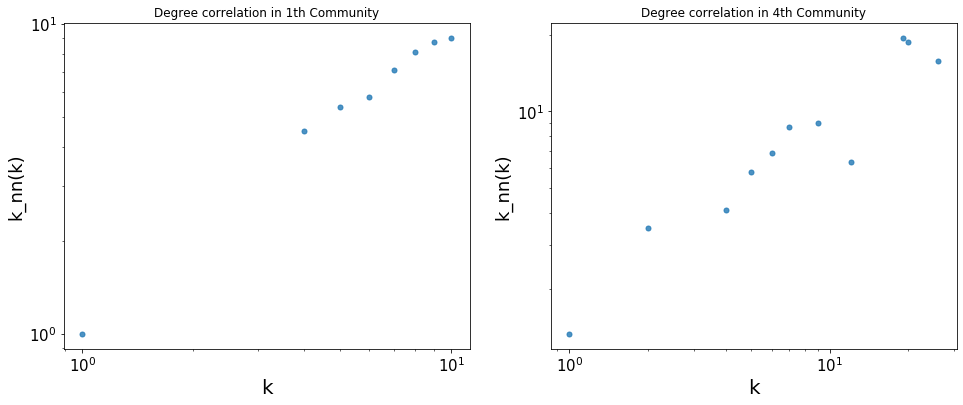

In [30]:
fig = plt.figure(figsize=(16,6) )

plt.subplot(1,2,1)
plt.plot(list(knn_comm[0].keys()), list(knn_comm[0].values()), '.', ms=10, alpha=0.8)
plt.loglog()
plt.xlabel("k", fontsize=20)
plt.ylabel("k_nn(k)",fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Degree correlation in 1th Community")


plt.subplot(1,2,2)
plt.plot(list(knn_comm[3].keys()), list(knn_comm[3].values()), '.', ms=10, alpha=0.8)
plt.loglog()
plt.xlabel("k", fontsize=20)
plt.ylabel("k_nn(k)",fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Degree correlation in 4th Community")





plt.show()

Assortative on node properties

In [12]:
g_p = g_l.copy()

In [13]:
import pandas as pd
import numpy as np

In [14]:
listings = pd.read_csv(r"C:\Users\Gianmarco\Dropbox\Il mio PC (DESKTOP-DM1F9TN)\Desktop\SocialNetworkAnalysis\progetto\Data\listings_amsterdam.csv")
listings = listings[listings.reviewnumber != '[]' ]
listings = listings[listings.rating != '[]' ]
info = listings[['listing_id','rating']]
info['rating'] = info.rating.astype(float).astype(int)

C:\Users\Gianmarco\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [18]:
info.rating.unique()

array([4, 5])

In [15]:
info

,listing_id,rating
0,2818,4
2,15458166,4
3,17632137,4
4,20203218,4
5,26560199,4
...,...,...
166,21354405,4
167,23747999,4
168,26000561,4
169,33990484,4


In [16]:
info.shape

(153, 2)

In [17]:
dizio = {}
for _, row in info.iterrows():
    dizio[str(row['listing_id'])] = row['rating']    

In [18]:
dizio

{'2818': 4,
 '15458166': 4,
 '17632137': 4,
 '20203218': 4,
 '26560199': 4,
 '654931': 4,
 '8874073': 4,
 '10923071': 4,
 '25310162': 4,
 '29776071': 4,
 '29901220': 4,
 '685990': 4,
 '1986095': 4,
 '2761156': 4,
 '2763386': 4,
 '35377242': 4,
 '730916': 4,
 '6845563': 4,
 '12801514': 4,
 '24628192': 4,
 '27863226': 4,
 '29919168': 4,
 '835550': 4,
 '12002357': 4,
 '13825291': 4,
 '14622016': 4,
 '14829814': 4,
 '759060': 4,
 '927119': 4,
 '1155251': 4,
 '2661450': 5,
 '3428947': 4,
 '4119684': 4,
 '19242200': 5,
 '24981353': 4,
 '761411': 4,
 '1583266': 4,
 '1035801': 4,
 '3722301': 4,
 '8398522': 4,
 '8706862': 4,
 '15110159': 4,
 '17859181': 4,
 '19796378': 4,
 '24117588': 4,
 '28042923': 4,
 '1230403': 4,
 '1924194': 4,
 '3003918': 4,
 '8028683': 4,
 '9996040': 4,
 '10240434': 4,
 '15780515': 4,
 '15959684': 5,
 '17005568': 5,
 '19890254': 4,
 '22092298': 4,
 '27725104': 4,
 '1246308': 4,
 '2472277': 4,
 '2700366': 4,
 '2783156': 4,
 '3652804': 4,
 '4656557': 4,
 '4949644': 4,
 '67

In [19]:
nx.set_node_attributes(g_p, dizio, "rating")

In [21]:
for u,data in g_p.nodes(data=True):
    del data['bipartite']

In [22]:
for u,data in g_p.nodes(data = True):
    print(u,data)

3270897 {'rating': 4}
1230403 {'rating': 4}
15780515 {'rating': 4}
22092298 {'rating': 4}
13189108 {'rating': 4}
2761156 {'rating': 4}
15564496 {'rating': 4}
15959684 {'rating': 5}
27525864 {'rating': 5}
30140860 {'rating': 4}
21321370 {'rating': 4}
3722301 {'rating': 4}
20702723 {'rating': 4}
8398522 {'rating': 4}
39168555 {'rating': 4}
37161821 {'rating': 4}
1155251 {'rating': 4}
1601408 {'rating': 4}
8475898 {'rating': 4}
7812608 {'rating': 4}
14792704 {'rating': 4}
24117588 {'rating': 4}
16804326 {'rating': 4}
1986095 {'rating': 4}
40791472 {'rating': 4}
24789739 {'rating': 5}
7962809 {'rating': 4}
2429334 {'rating': 4}
10800247 {'rating': 4}
34882977 {'rating': 4}
1321735 {'rating': 4}
23819110 {'rating': 5}
35464664 {'rating': 4}
17632137 {'rating': 4}
14313251 {'rating': 4}
10934482 {'rating': 4}
4282415 {'rating': 4}
11899719 {'rating': 4}
20878711 {'rating': 4}
10923071 {'rating': 4}
23747999 {'rating': 4}
32008398 {'rating': 5}
4076501 {'rating': 4}
835550 {'rating': 4}
27831

In [23]:
g_p.nodes['2818']["rating"]

4

In [24]:
lista= comm  #una funzione crescente indica un assortative mixing, se ottengo una funz decerscente i nodi sono tutti diversi
for i in range (0, len(lista)):
    c=g_p.subgraph(lista[i])
    try:
        print("Assortativity cluster {} : {} ".format(i, attribute_assortativity_coefficient(c, 'rating') ))
    except:
        pass
#dal cluster 2 in poi, tutti i nodi hanno degree uguale all'interno del cluster (es: tutti degree==17)

Assortativity cluster 0 : -0.01964869427781183 
Assortativity cluster 1 : 0.43749999999999994 
Assortativity cluster 2 : nan 
Assortativity cluster 3 : 0.1055778946283135 


C:\Users\Gianmarco\anaconda3\lib\site-packages\networkx\algorithms\assortativity\correlation.py:265: RuntimeWarning: invalid value encountered in true_divide
  r = (t - s) / (1 - s)
